![image info](https://ineuron.ai/images/ineuron-logo.png)

### Missing values approaches

* Check for Missing data
* Drop NA Values
* MEAN/MEDAIN Imputation
* Random sample imputation

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/google_cleaned.csv')

**Show Top 5 Records**

In [3]:
#sample of the data(random_sample)
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
2735,Ratings by Consumer Reports,SHOPPING,4.3,3420,13.0,100000,Free,0.00,Everyone,Shopping,2018-02-27,2.3.2,4.1 and up,27,2,2018
2072,Thomas & Friends: Race On!,FAMILY,4.1,29319,26.0,5000000,Free,0.00,Everyone,Casual;Action & Adventure,2018-05-18,2.4,4.4 and up,18,5,2018
7432,CJ Apps,BUSINESS,NaN,0,24.0,10,Free,0.00,Everyone,Business,2018-04-10,2.1,4.1 and up,10,4,2018
2354,Epocrates Plus,MEDICAL,4.3,23889,NaN,1000000,Free,0.00,Everyone,Medical,2018-07-10,Varies with device,4.0 and up,10,7,2018
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.00,Teen,Dating,2018-07-14,4.0,4.0.3 and up,14,7,2018
6179,Es-Bg Offline Voice Translator,TRAVEL_AND_LOCAL,NaN,1,87.0,10,Paid,1.49,Everyone,Travel & Local,2017-03-19,2.55,3.0 and up,19,3,2017
9663,EO Hub,BUSINESS,NaN,0,5.2,50,Free,0.00,Teen,Business,2018-02-06,3.5.4,4.1 and up,6,2,2018
2516,RT 516 VET,MEDICAL,NaN,0,29.0,10,Free,0.00,Everyone,Medical,2018-07-13,300000.1.11,4.0.3 and up,13,7,2018
7446,CJmall,SHOPPING,3.7,18253,10.0,10000000,Free,0.00,Everyone,Shopping,2018-08-06,6.3.8,4.1 and up,6,8,2018
2885,Muzy - Share photos & collages,PHOTOGRAPHY,4.4,70189,13.0,5000000,Free,0.00,Teen,Photography,2015-08-11,4.0.10,4.0 and up,11,8,2015


### 1. Check for Missing data

In [4]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [5]:
df.isna().sum().sort_values(ascending=False) 

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [6]:
df.shape[0] 

10840

In [7]:
(1695/10840)*100

15.636531365313653

In [9]:
null_df = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


In [10]:
#plotting the num value counts

In [11]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)

In [12]:
null_counts

Size              0.156365
Rating            0.135978
Current Ver       0.000738
Android Ver       0.000185
Type              0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Day               0.000000
Month             0.000000
Year              0.000000
dtype: float64

In [13]:
len(null_counts)

16

In [14]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
np.arange(len(null_counts))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

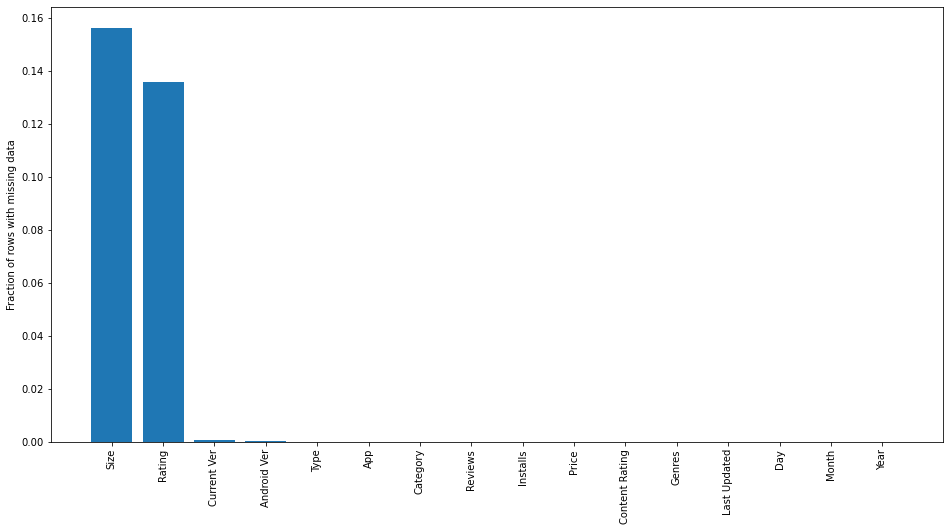

In [69]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [67]:
null_counts.index

Index(['Size', 'Rating', 'Current Ver', 'Android Ver', 'Type', 'App',
       'Category', 'Reviews', 'Installs', 'Price', 'Content Rating', 'Genres',
       'Last Updated', 'Day', 'Month', 'Year'],
      dtype='object')

### 2. Drop NA Values

In [17]:
#this is best practice to create a copy of the data

In [18]:
df_copy = df.copy()

In [19]:
cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [20]:
df_copy["Size"].isnull().sum()

1695

In [21]:
df_copy["Size"].isnull().mean()*100

15.636531365313653

In [22]:
df_copy["Price"].isnull().mean()*100

0.0

In [23]:
if df_copy["Size"].isnull().sum():
    print("yes")
else:
    print("no")

yes


In [24]:
if df_copy["Price"].isnull().mean()*100:
    print("yes")
else:
    print("no")

no


In [25]:
False+True

1

## dropping missing values

In [26]:
df.shape

(10840, 16)

(7723, 5)

In [ ]:
10840-7723

In [32]:
drop_df = df_copy[cols].dropna()
drop_df

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.000,Free,1.0.0,4.0.3 and up
1,3.9,14.000,Free,2.0.0,4.0.3 and up
2,4.7,8.700,Free,1.2.4,4.0.3 and up
3,4.5,25.000,Free,Varies with device,4.2 and up
4,4.3,2.800,Free,1.1,4.4 and up
...,...,...,...,...,...
10832,4.8,0.619,Free,0.8,2.2 and up
10833,4.0,2.600,Free,1.0.0,4.1 and up
10835,4.5,53.000,Free,1.48,4.1 and up
10836,5.0,3.600,Free,1.0,4.1 and up


In [34]:
drop_df.shape

(7723, 5)

In [35]:
df_copy.shape, drop_df.shape

((10840, 16), (7723, 5))

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

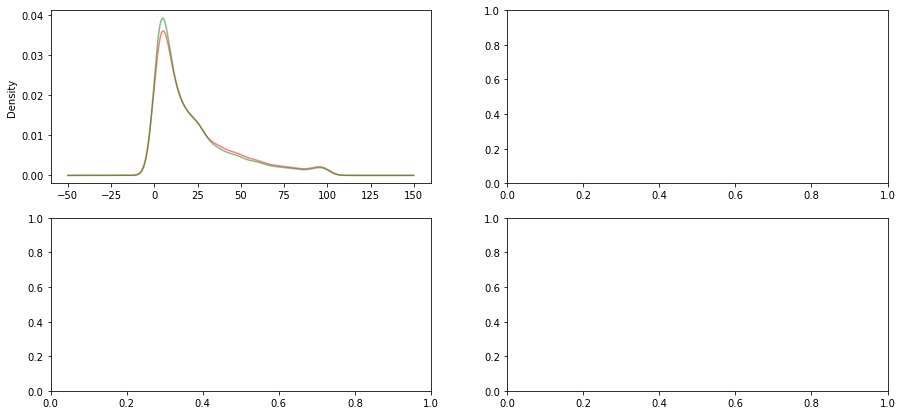

In [36]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')

<Figure size 432x288 with 0 Axes>

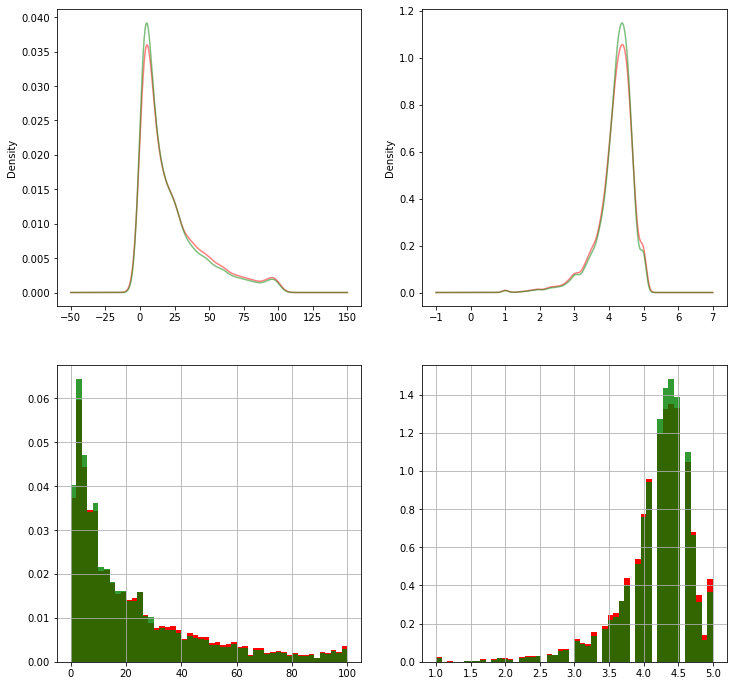

In [37]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
drop_df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
drop_df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
drop_df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

#### Insights
-As we can observe from above plots
- Drop NA Technique is changing our distribution pattern
- So we reject Drop NA Technique

### 3. MEAN/MEDAIN Imputation

In [38]:
df_copy_me_mo = df.copy()

In [39]:
df_copy_me_mo[df_copy_me_mo.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_copy_me_mo[df_copy_me_mo['Size'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up,14,7,2018
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,30,7,2018
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,30,7,2018
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,30,7,2018
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device,25,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10712,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,100000,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device,24,7,2018
10724,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up,27,9,2017
10764,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device,23,5,2018
10825,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device,23,3,2018


In [41]:
df_copy_me_mo['Size'].mean()

21.506534062329052

In [42]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())

In [43]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())
df_copy_me_mo['median_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median())
df_copy_me_mo['mean_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].mean())
df_copy_me_mo['median_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].median())

In [44]:
print('Original Size Variance', df_copy_me_mo['Size'].var())

Original Size Variance 510.5801557864865


In [45]:
print('Size Variance After mean imputation', df_copy_me_mo['mean_Size'].var())

Size Variance After mean imputation 430.7357638630519


In [46]:
print('Size Variance After median imputation', df_copy_me_mo['median_Size'].var())

Size Variance After median imputation 440.28217654605237


## mean will be a good option, as less variance


In [47]:
print('Original Rating Variance', df_copy_me_mo['Rating'].var())
print('Rating Variance After mean imputation', df_copy_me_mo['mean_Rating'].var())
print('Rating Variance After median imputation', df_copy_me_mo['median_Rating'].var())

Original Rating Variance 0.26545047227541496
Rating Variance After mean imputation 0.22935175503821595
Rating Variance After median imputation 0.23072842363353122


#### Insights
- As we can observe Variance is distorted after both mean and median imputation

<AxesSubplot:ylabel='Density'>

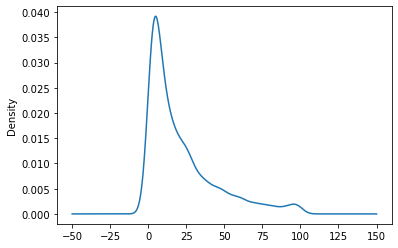

In [48]:
df_copy_me_mo['Size'].plot.density()

<AxesSubplot:ylabel='Density'>

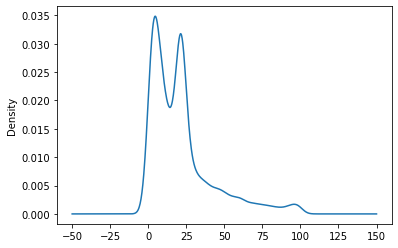

In [49]:
df_copy_me_mo['mean_Size'].plot.density()

<AxesSubplot:ylabel='Density'>

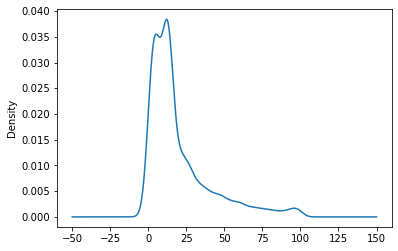

In [50]:
df_copy_me_mo['median_Size'].plot.density()

<Figure size 432x288 with 0 Axes>

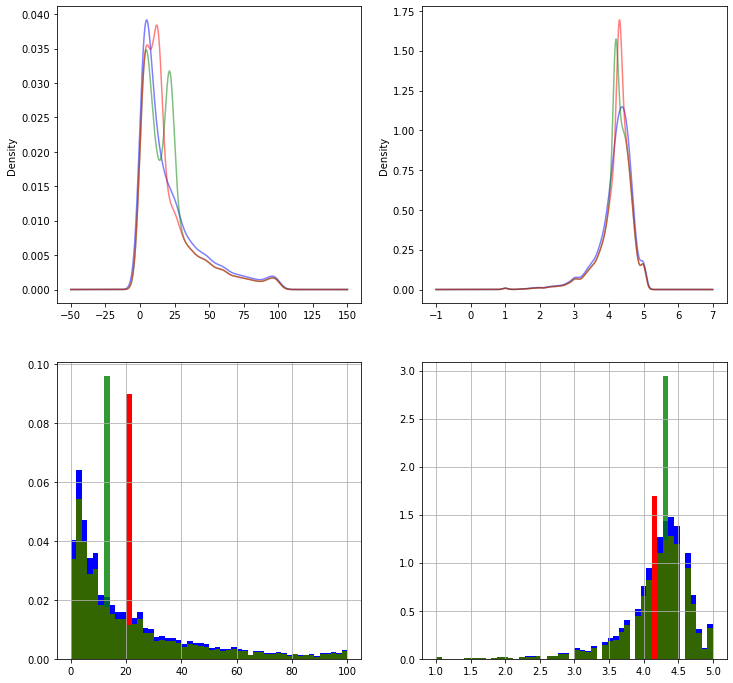

In [51]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df_copy_me_mo['Size'].plot.density(color='blue',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy_me_mo['mean_Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='mean_Size')
df_copy_me_mo['median_Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='median_Size')

df_copy_me_mo['Rating'].plot.density(color='blue',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy_me_mo['mean_Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='mean_Rating')
df_copy_me_mo['median_Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='median_Rating')

df_copy_me_mo['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)

df_copy_me_mo['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)


plt.show()

#### Insights
-As we can observe from above plots
- Mean and median imputation Technique is changing our distribution pattern.
- So we will reject mean and median imputation Technique also.

### 4. Random Sample Imputation

In [52]:
df_random = df.copy()

In [53]:
df_random['Size'].dropna().sample(20)

10126    47.0
4254     23.0
8581     23.0
8792      1.2
3661     22.0
4397     21.0
5633     54.0
10193    10.0
8080     16.0
3327      2.4
6596      4.6
6781     13.0
8096      8.1
7677      4.1
5492     35.0
9688     73.0
9338      3.1
6469     47.0
2764     16.0
8801     58.0
Name: Size, dtype: float64

In [54]:
[df_random['Size'].isnull().sum()

SyntaxError: unexpected EOF while parsing (520945010.py, line 1)

In [55]:
df_random[df_random['Size'].isnull()].index

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10646, 10678, 10680, 10706, 10711, 10712, 10724, 10764, 10825,
            10838],
           dtype='int64', length=1695)

In [56]:
df_random['Size'].dropna().sample(1695)

8845     2.6
5361     2.0
7131    14.0
2827    23.0
2473     6.9
        ... 
5550    30.0
3386     1.1
4836    44.0
1462    13.0
1233    22.0
Name: Size, Length: 1695, dtype: float64

In [57]:
df_random[feature].dropna().sample(df_random[feature].isnull().sum())

NameError: name 'feature' is not defined

In [58]:
def Random_Sample_imputation(feature):
    random_sample=df_random[feature].dropna().sample(df_random[feature].isnull().sum())               
    random_sample.index=df_random[df_random[feature].isnull()].index
    df_random.loc[df_random[feature].isnull(),feature]=random_sample

In [59]:
for col in df_random:
    Random_Sample_imputation(col)

In [60]:
print('Original Size Variance', df['Size'].var())
print('Size Variance After Random imputation', df_random['Size'].var())

Original Size Variance 510.5801557864865
Size Variance After Random imputation 512.9539064485792


In [61]:
print('Original Size Variance', df['Rating'].var())
print('Size Variance After Rating imputation', df_random['Rating'].var())

Original Size Variance 0.26545047227541496
Size Variance After Rating imputation 0.26347504314234665


<Figure size 432x288 with 0 Axes>

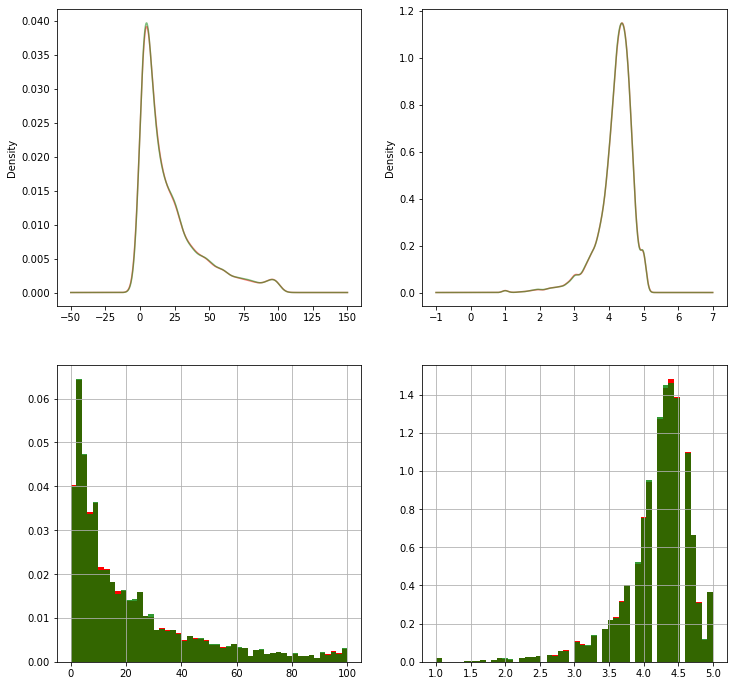

In [62]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_random['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_random['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_random['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_random['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

In [63]:
null_df = pd.DataFrame({'Null Values' : df_random.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_random.isna().sum().sort_values(ascending=False)) / (df_random.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


#### Insights
-As we can observe from above plots
- Random Sample imputation Technique has no impact on distribution pattern.
- So we will accept Random Sample imputation Technique .

In [64]:
num_features=[col for col in df_random.columns if df_random[col].dtype!='O']
num_df = df_random[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [65]:
df_random.to_csv('data/google_missing_imputed.csv', index = False)